In [1]:
# https://yt-project.org/
# Import the shiiiii

import yt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from FLASH_functions import *

## First, let's just take a look at some slices of the data

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-07-24 12:57:27,414 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-07-24 12:57:27,451 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-24 12:57:27,452 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-24 12:57:27,452 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-24 12:57:27,453 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-24 12:57:27,453 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [3]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
# print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[288 272 288]
2


yt : [INFO     ] 2024-07-24 12:57:29,035 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:29,035 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:29,038 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:29,038 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:29,040 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [-0.5  0.5  0. ] code_length: [3.73015176e-05] code_mass/code_length**3



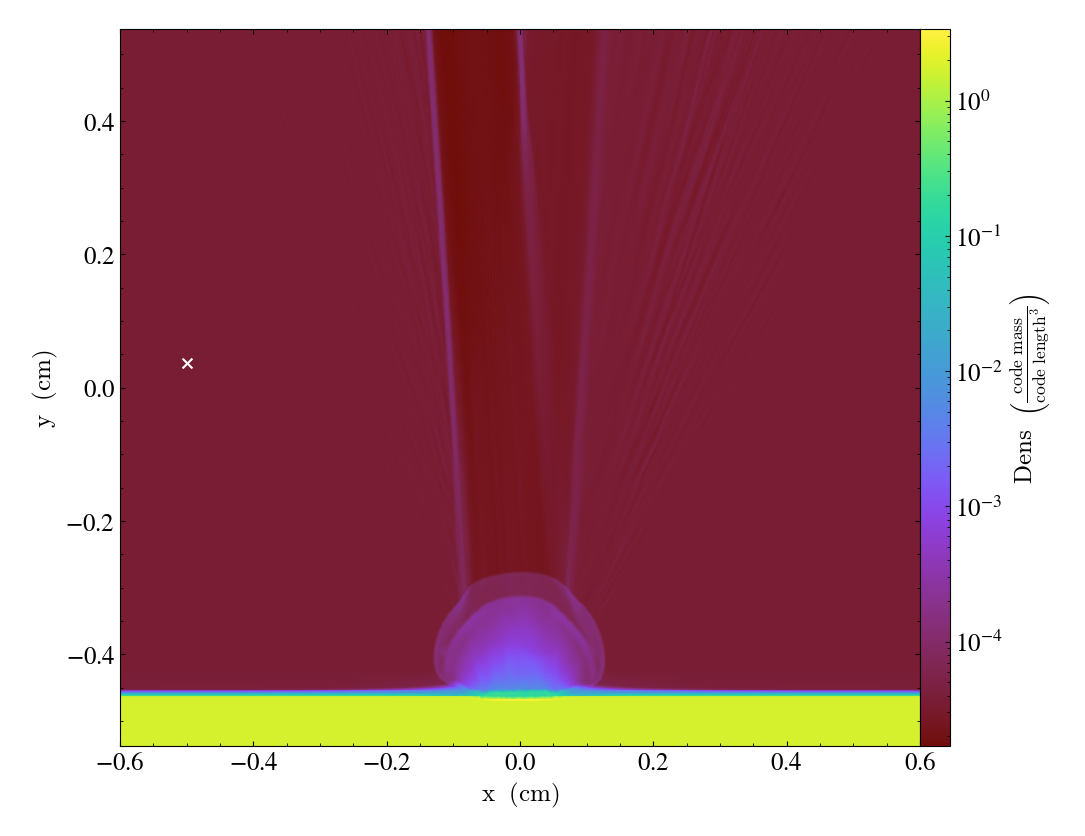

In [4]:
# Find some points in the background to pull values from

# background_pt = [0.3, 0.3, 0.0]
background_pt = [-0.5, 0.5, 0.0]

rho_0 = pull_value_at_coord(background_pt,'dens',ds)

# looks good

In [5]:
# perform appropriate conversions to get the number density of ions and electrons

def make_ion_number_density(field, data):
    avogadro = 6.022e23
    ion_number_density = avogadro*data["flash","dens"]*data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 6.022e23
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-07-24 12:58:05,431 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:58:05,432 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:58:05,434 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:58:05,435 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:58:05,437 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800


edens at [-0.6  0.7  0. ] code_length: [6.78910541e+18] code_mass/code_length**3



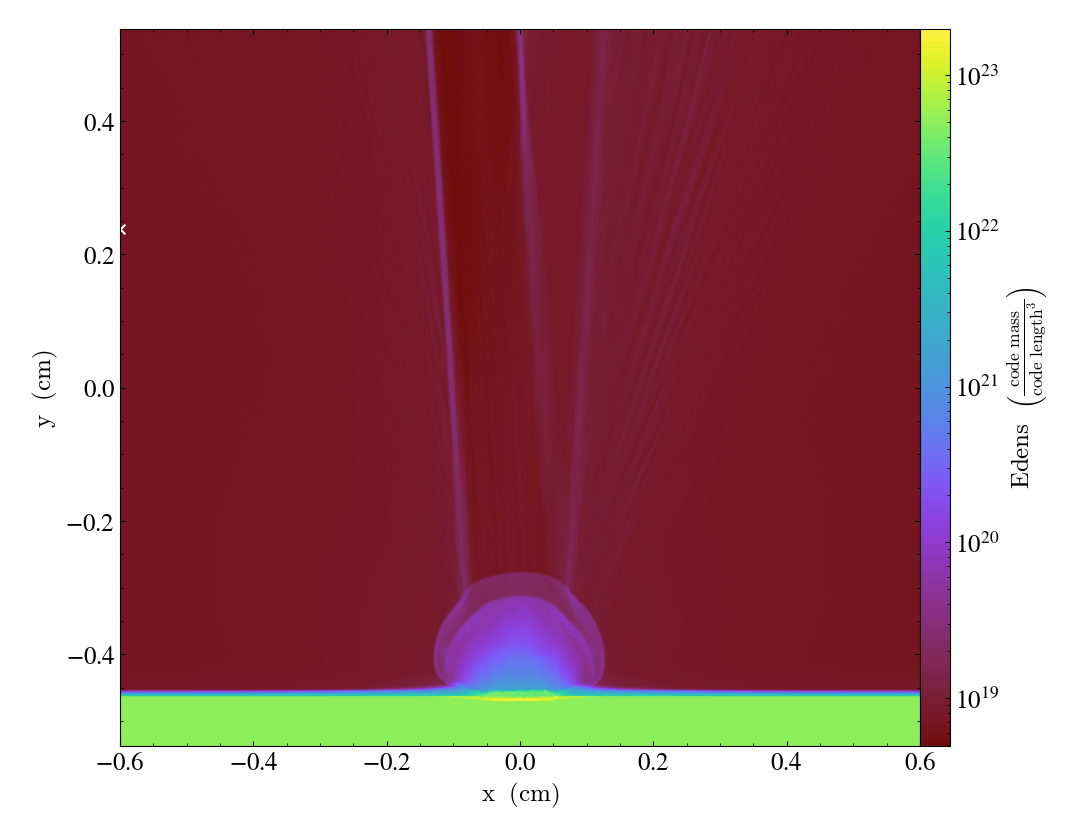

yt : [INFO     ] 2024-07-24 12:58:06,023 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:58:06,024 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:58:06,026 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:58:06,027 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:58:06,028 Making a fixed resolution buffer of (('flash', 'idens')) 800 by 800


idens at [-0.6  0.7  0. ] code_length: [8.32549275e+17] code_mass/code_length**3



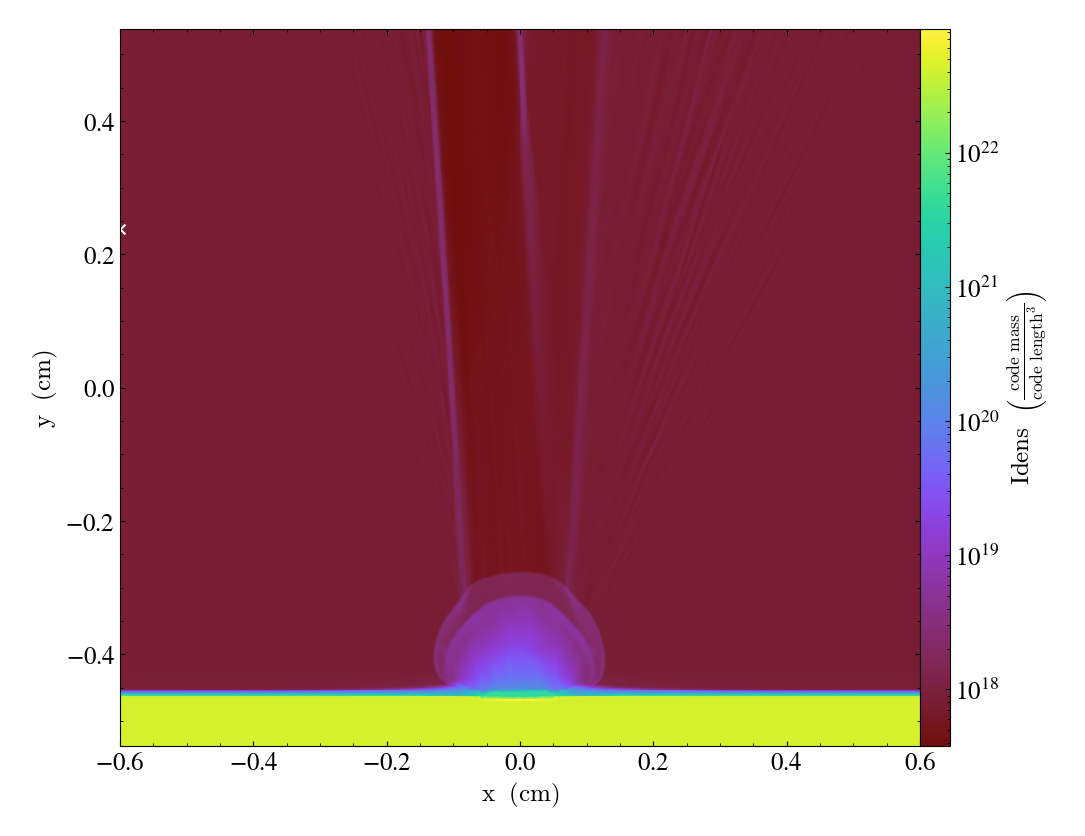

In [19]:
background_pt = [-0.6, 0.7, 0.0]

ne_0 = pull_value_at_coord(background_pt,'edens',ds)
ni_0 = pull_value_at_coord(background_pt,'idens',ds)

yt : [INFO     ] 2024-07-24 12:57:30,733 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:30,734 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:30,737 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:30,737 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:30,739 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800


magx at [-0.5  0.5  0. ] code_length: [149999.19126595] code_magnetic



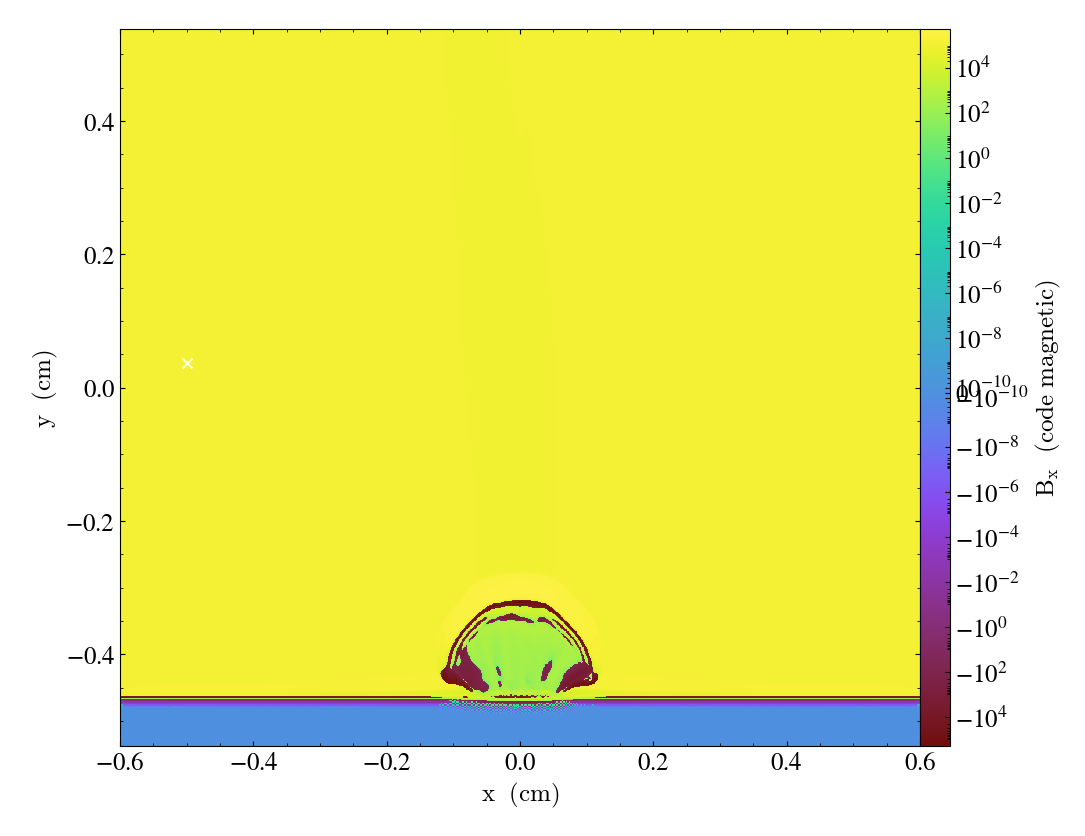

6928205.0801057825


In [7]:
Bx_0 = pull_value_at_coord(background_pt,'magx',ds)

v_alfven = Bx_0.value[0]/np.sqrt(4*np.pi*rho_0.value[0])
print(v_alfven)

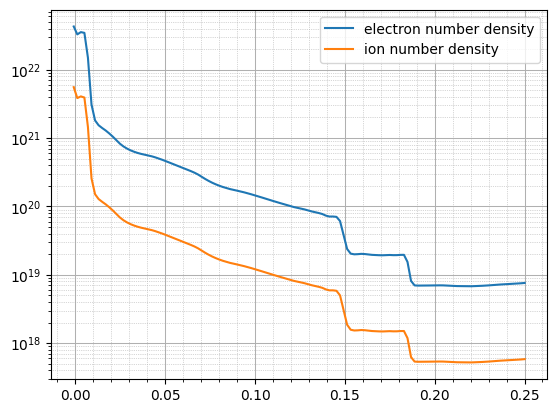

In [8]:
# Take a lineout of the number density to find where the target ends and where the piston begins
ray = ds.ray((0, 0.00, 0), (0, .25, 0))
y = np.array(ray[('flash','y')])
idens = np.array(ray[('flash','idens')])

edens = np.array(ray[('flash','edens')])
plt.semilogy(y, edens, label='electron number density')
plt.semilogy(y, idens, label='ion number density')
plt.legend()

from transform import pretty_plot
pretty_plot()

# based on this plot, it looks like the piston begins at y = 0.01

mach number is between 3.3307273618027793 and 15.479316639984368


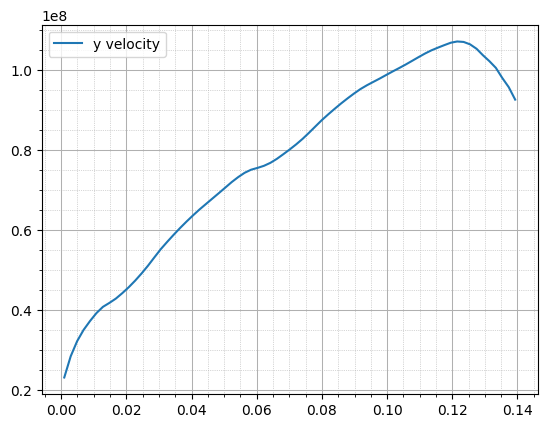

In [9]:
piston_ray = ds.ray((0, 0.01, 0), (0, .15, 0))
vely = np.array(piston_ray[('flash','vely')])
piston = np.array(piston_ray[('flash','y')])-0.01

plt.plot(piston, vely, label='y velocity')
pretty_plot()
plt.legend()

mach_number_max = np.max(vely)/v_alfven
mach_number_min = np.min(vely)/v_alfven

print(f"mach number is between {mach_number_min} and {mach_number_max}")

yt : [INFO     ] 2024-07-24 12:57:31,958 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:31,959 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:31,961 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:31,961 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:31,962 Making a fixed resolution buffer of (('flash', 'tion')) 800 by 800


tion at [-0.5  0.5  0. ] code_length: [330137.57588358] code_temperature



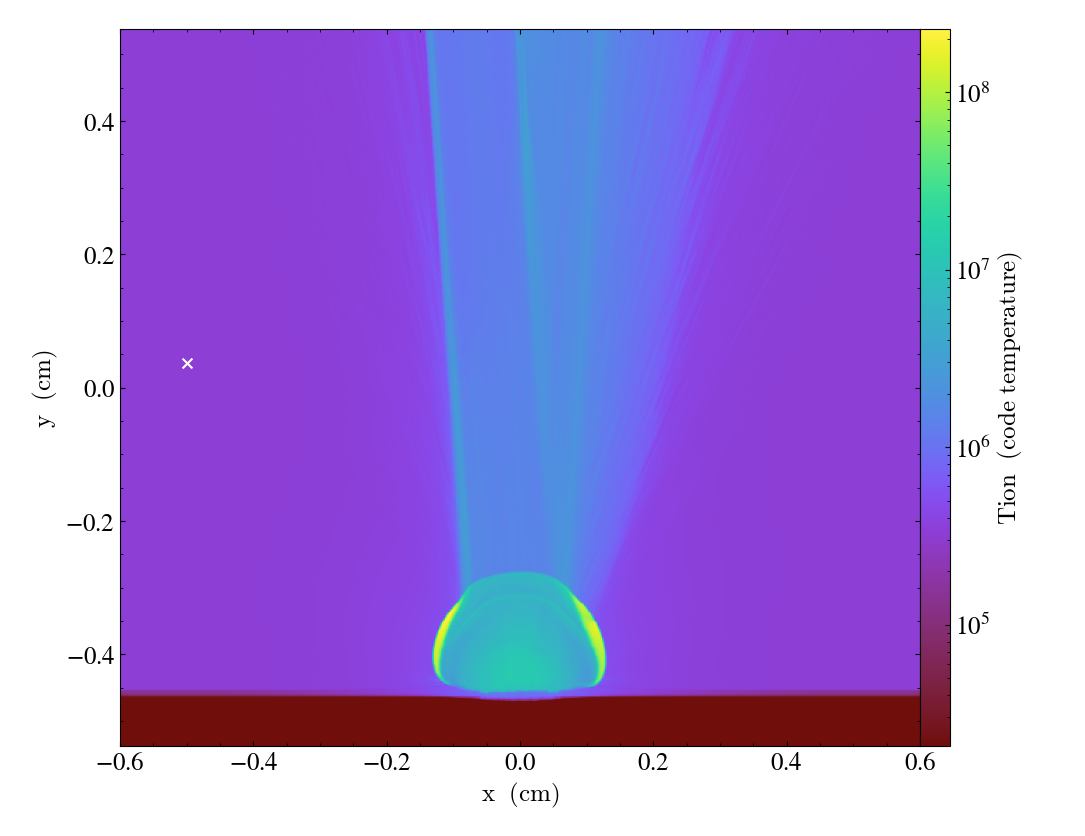

yt : [INFO     ] 2024-07-24 12:57:32,531 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:32,531 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:32,533 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 12:57:32,534 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 12:57:32,535 Making a fixed resolution buffer of (('flash', 'tele')) 800 by 800


tele at [-0.5  0.5  0. ] code_length: [326199.48278516] code_temperature



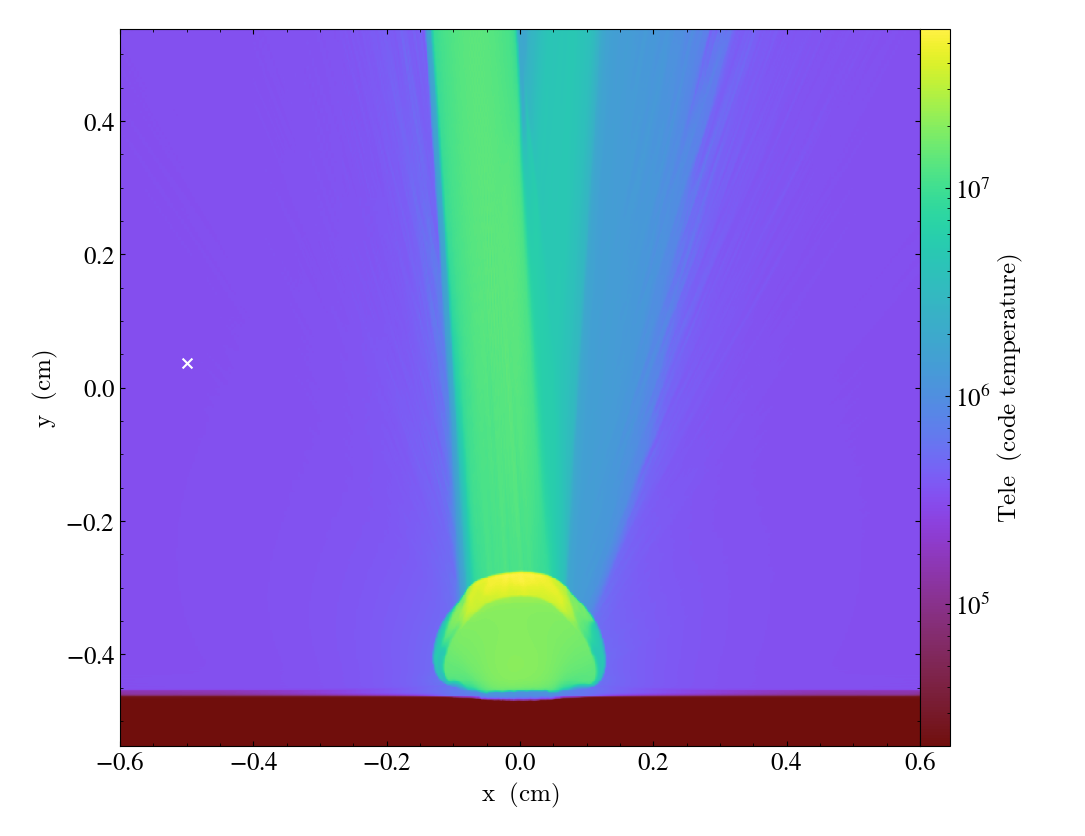

In [10]:
Ti_0 = pull_value_at_coord(background_pt,'tion',ds)

Te_0 = pull_value_at_coord(background_pt,'tele',ds)

## Now, start making (throwing) fits!

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 84
    # data points      = 71
    # variables        = 3
    chi-square         = 4322.80688
    reduced chi-square = 63.5706894
    Akaike info crit   = 297.737604
    Bayesian info crit = 304.525643
    R-squared          = 0.98028895
[[Variables]]
    A:      231.571653 +/- 4.57951816 (1.98%) (init = 0.1)
    alpha:  41.6971097 +/- 1.62097595 (3.89%) (init = 10)
    C:      2.58126734 +/- 1.61798527 (62.68%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, C) = +0.6941
    C(A, alpha) = +0.4939


Text(0.5, 1.0, 'exponential fit of density profile')

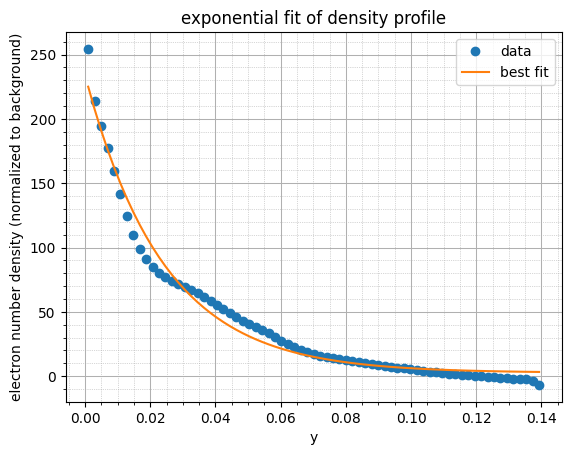

In [11]:
edens = np.array(piston_ray[('flash','edens')]-piston_ray[('flash','edens')][-10])/ne_0.value

from lmfit import Model

def exponential(y, A, alpha, C):
    return A * np.exp(-alpha * y) + C

# Create a model
exp_model = Model(exponential)

# Initial guess for the parameters
params = exp_model.make_params(A=0.1, alpha=10.0, C=0.0)

# Perform the fit
result = exp_model.fit(edens, params, y=piston)

print(result.fit_report())

# Plot the data and the fitted curve
result.plot_fit()
plt.ylabel('electron number density (normalized to background)')

pretty_plot()
plt.title('exponential fit of density profile')

coefficients for the polynomial fit: [-1.02300420e-18  2.69229362e-15 -2.75528943e-12  1.32050701e-09
 -2.39957097e-07 -3.19608828e-05  2.07032352e-02 -3.39216518e+00
  2.67038088e+02] 

(-1.0230e-18)*x1^8 + (2.6923e-15)*x1^7 + (-2.7553e-12)*x1^6 + (1.3205e-09)*x1^5 + (-2.3996e-07)*x1^4 + (-3.1961e-05)*x1^3 + (2.0703e-02)*x1^2 + (-3.3922e+00)*x1^1 + (2.6704e+02)*x1^0


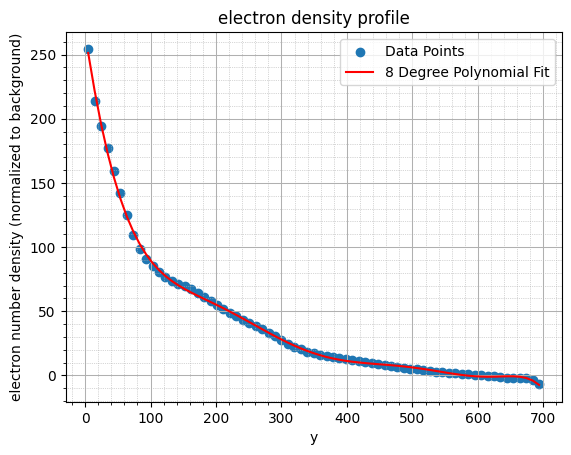

roots at [-245.75705415  581.35395715]


In [12]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 8
c_omega_pe_osiris = 4.9787e+03
piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston*c_omega_pe_osiris
field_ray = np.array(piston_ray[('flash','edens')]-piston_ray[('flash','edens')][-10])/ne_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))



plt.ylabel('electron number density (normalized to background)')
plt.title('electron density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)

# Filter out the complex roots and keep only the real roots
real_zero_points = zero_points[np.isreal(zero_points)].real

print(f'roots at {real_zero_points}')

coefficients for the polynomial fit: [-6.99829347e-19  1.84143314e-15 -1.88462233e-12  9.03849175e-10
 -1.64905808e-07 -2.14640602e-05  1.40599075e-02 -2.30662468e+00
  1.81631254e+02] 

(-6.9983e-19)*x1^8 + (1.8414e-15)*x1^7 + (-1.8846e-12)*x1^6 + (9.0385e-10)*x1^5 + (-1.6491e-07)*x1^4 + (-2.1464e-05)*x1^3 + (1.406e-02)*x1^2 + (-2.3066e+00)*x1^1 + (1.8163e+02)*x1^0


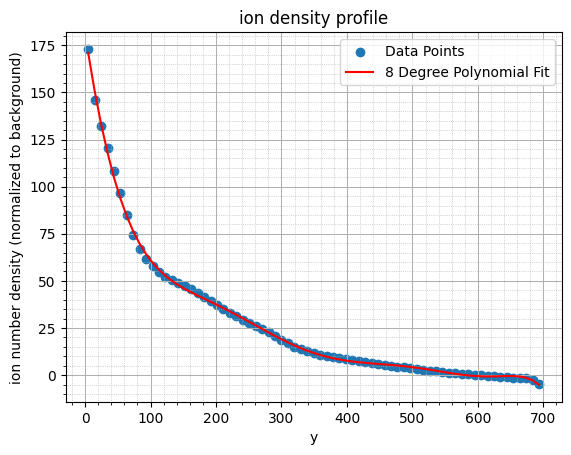

roots at [-245.00366817  581.35186083]


In [13]:
# Try fitting to a polynomial instead of an exponential

# If you want to fit it to something useful by osiris, you need to first convert your y axis to omega_pe
degree = 8

piston = np.array(piston_ray[('flash','y')])-0.01
piston = piston*c_omega_pe_osiris
field_ray = np.array(piston_ray[('flash','idens')]-piston_ray[('flash','idens')][-10])/ni_0.value # ask derek about this
coefficients = np.polyfit(piston, field_ray, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, field_ray, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
pretty_plot()

plt.legend()

print(f"coefficients for the polynomial fit: {coefficients} \n")

result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))



plt.ylabel('ion number density (normalized to background)')
plt.title('ion density profile')
plt.show()

# Find the x-values where the polynomial fit reaches zero
zero_points = np.roots(coefficients)

# Filter out the complex roots and keep only the real roots
real_zero_points = zero_points[np.isreal(zero_points)].real

print(f'roots at {real_zero_points}')

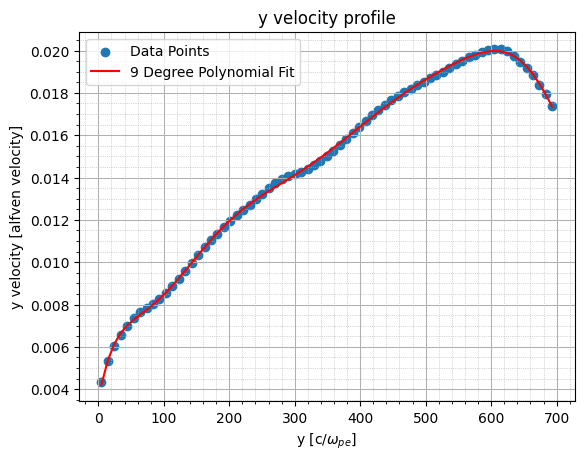

(4.7383e-25)*x1^9 + (-1.601e-21)*x1^8 + (2.2802e-18)*x1^7 + (-1.7783e-15)*x1^6 + (8.2448e-13)*x1^5 + (-2.3065e-10)*x1^4 + (3.7746e-08)*x1^3 + (-3.3541e-06)*x1^2 + (1.718e-04)*x1^1 + (3.4661e-03)*x1^0


In [14]:
degree = 9
alfven_speed_osiris = 0.001298
vely = np.array(piston_ray[('flash','vely')])/v_alfven*alfven_speed_osiris
coefficients = np.polyfit(piston, vely, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, vely, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('y velocity [alfven velocity]')
pretty_plot()

plt.title('y velocity profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

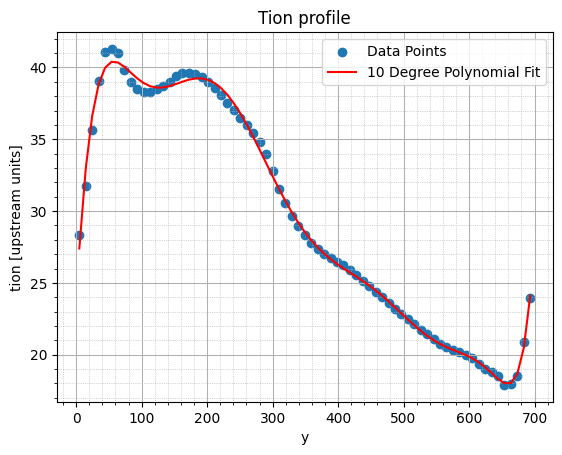

In [15]:
tion = np.array(piston_ray[('flash','tion')])/Ti_0.value

degree = 10
coefficients = np.polyfit(piston, tion, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tion, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tion [upstream units]')
pretty_plot()

plt.title('Tion profile')
plt.legend()
plt.show()

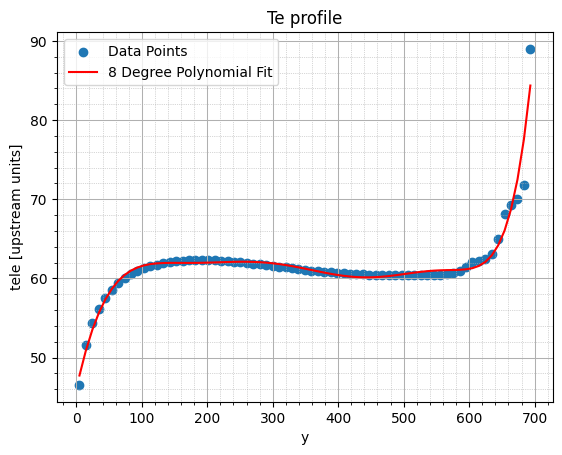

In [16]:
tele = np.array(piston_ray[('flash','tele')])/Te_0.value

degree = 8
coefficients = np.polyfit(piston, tele, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(piston)

# Plot the original data points
plt.scatter(piston, tele, label='Data Points')

# Plot the polynomial fit
plt.plot(piston, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel('y')
plt.ylabel('tele [upstream units]')
pretty_plot()

plt.title('Te profile')
plt.legend()
plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 7
    # variables        = 4
    chi-square         = 2.8211e-04
    reduced chi-square = 9.4038e-05
    Akaike info crit   = -62.8337940
    Bayesian info crit = -63.0501534
    R-squared          = 0.76273153
[[Variables]]
    A:      0.03220739 +/- 0.01042041 (32.35%) (init = 0.01)
    alpha:  151095.192 +/- 126568.324 (83.77%) (init = 1000)
    C:     -0.00162134 +/- 0.00642799 (396.46%) (init = 0)
    y_0:    0.00516634 +/- 6.0852e-04 (11.78%) (init = 0.004)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, C) = +0.6268
    C(A, C)     = -0.4678


Text(0.5, 1.0, 'gaussian fit of b field profile on left side of piston')

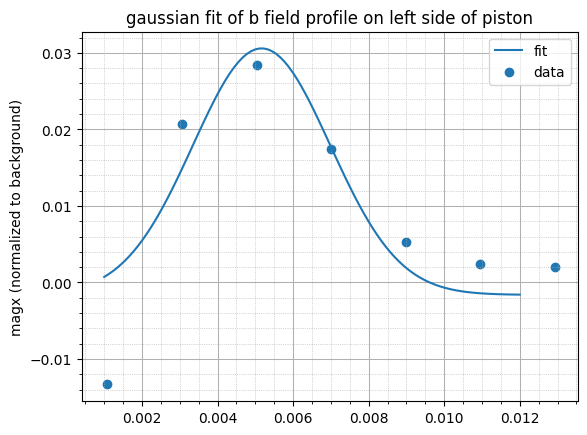

In [17]:
ray = ds.ray((0, 0.001, 0), (0, .012, 0))
magx = np.array(ray[('flash','magx')])/Bx_0.value
y = np.array(ray[('flash','y')])

def gaussian(y, A, alpha, C, y_0):
    return A * np.exp(-alpha * (y-y_0)**2) + C

# Create a model
gaussian_model = Model(gaussian)

# Initial guess for the parameters
params = gaussian_model.make_params(A=.01, alpha=1000.0, C=0.0, y_0=0.004)

# Perform the fit
result = gaussian_model.fit(magx, params, y=y)

print(result.fit_report())

# Plot the data and the fitted curve
y_smooth = np.linspace(0.001, 0.012, 100)
plt.plot(y_smooth, result.eval(y=y_smooth), label='fit')
plt.scatter(y, magx, label='data')
plt.ylabel('magx (normalized to background)')
plt.legend()
pretty_plot()
plt.title('gaussian fit of b field profile on left side of piston')

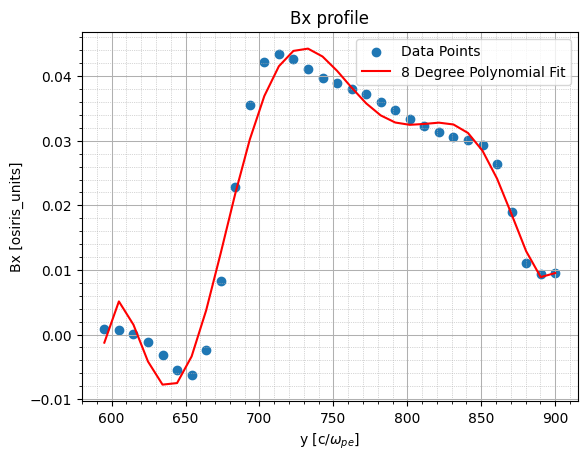

(-4.8445e-19)*x1^8 + (3.0949e-15)*x1^7 + (-8.5961e-12)*x1^6 + (1.3561e-08)*x1^5 + (-1.3292e-05)*x1^4 + (8.2899e-03)*x1^3 + (-3.2131e+00)*x1^2 + (7.0766e+02)*x1^1 + (-6.7812e+04)*x1^0


In [31]:
degree = 8
Bx_0_osiris = 0.013
ray = ds.ray((0, 0.13, 0), (0, .19, 0))
y = (np.array(ray['flash','y'])-0.01)*c_omega_pe_osiris
magx = np.array(ray[('flash','magx')])/Bx_0.value*Bx_0_osiris
coefficients = np.polyfit(y, magx, degree)

# Create a polynomial function from the coefficients
polynomial_function = np.poly1d(coefficients)

# (Optional) Plotting

# Calculate y values for the plotting range using the polynomial function
y_fit = polynomial_function(y)

# Plot the original data points
plt.scatter(y, magx, label='Data Points')

# Plot the polynomial fit
plt.plot(y, y_fit, color='red', label=f'{degree} Degree Polynomial Fit')

plt.xlabel(r'y [c/$\omega_{pe}$]')
plt.ylabel('Bx [osiris_units]')
pretty_plot()

plt.title('Bx profile')
plt.legend()
plt.show()


result = ''
for i in range(len(coefficients)):
    result = f"{result} ({np.format_float_scientific(coefficients[i],4)})*x1^"+str(degree-i) + " +"
print(result.strip(' +'))

yt : [INFO     ] 2024-07-24 15:50:40,696 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 15:50:40,696 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 15:50:40,699 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-24 15:50:40,700 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-24 15:50:40,701 Making a fixed resolution buffer of (('flash', 'sumy')) 800 by 800



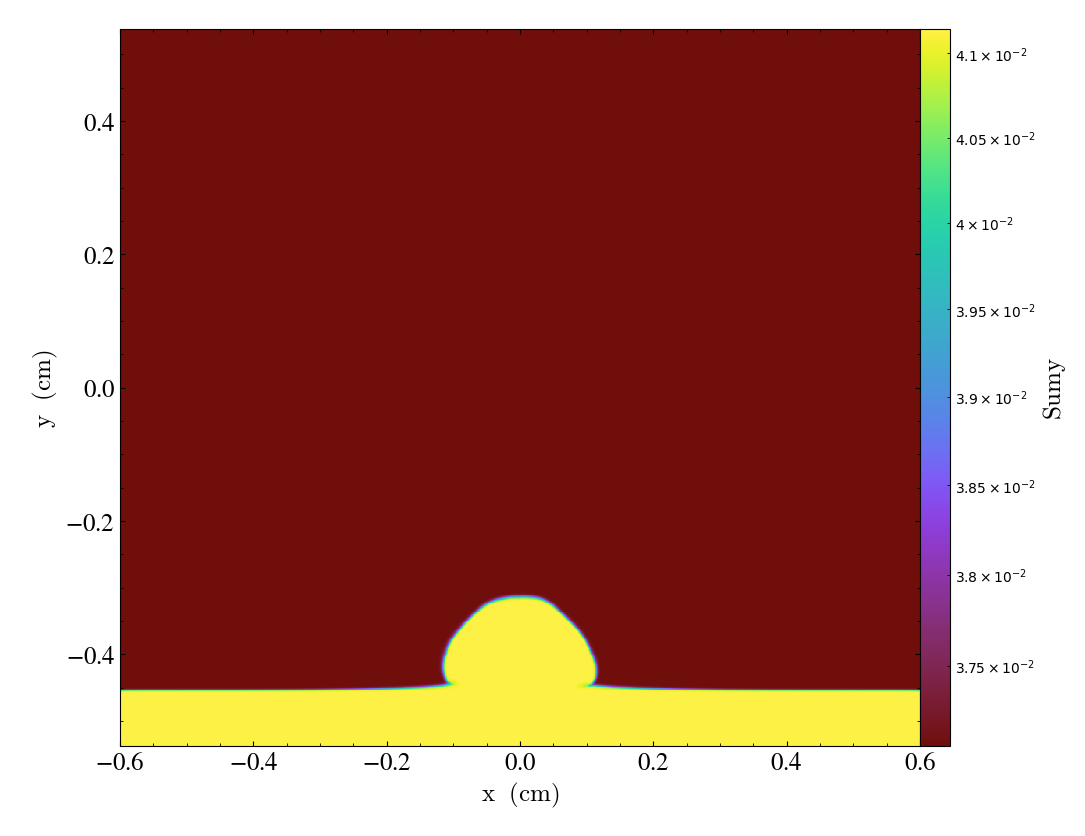

In [35]:
slc = yt.SlicePlot(ds, 'z', 'sumy')
slc.show()